In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial as factorial
import pandas as pd
from tqdm import tqdm
import seaborn as sn
import sys
from pathlib import Path
import matplotlib as mpl

# import custom functions from src folder
module_path = str(Path.cwd() / "../src")

if module_path not in sys.path:
    sys.path.append(module_path)

from util import *

In [21]:
nxMC = [10, 50, 100]
nr1MC = [10, 50, 100]
datafiles = [f"analytical_solution_x1_x2_grid_nxMC_{n}_nr1MC_50.csv" for n in nxMC]
#datafile = "analytical_solution_grid_100x100_nMC_10.csv"
data_df = [pd.read_csv(file) for file in datafiles]

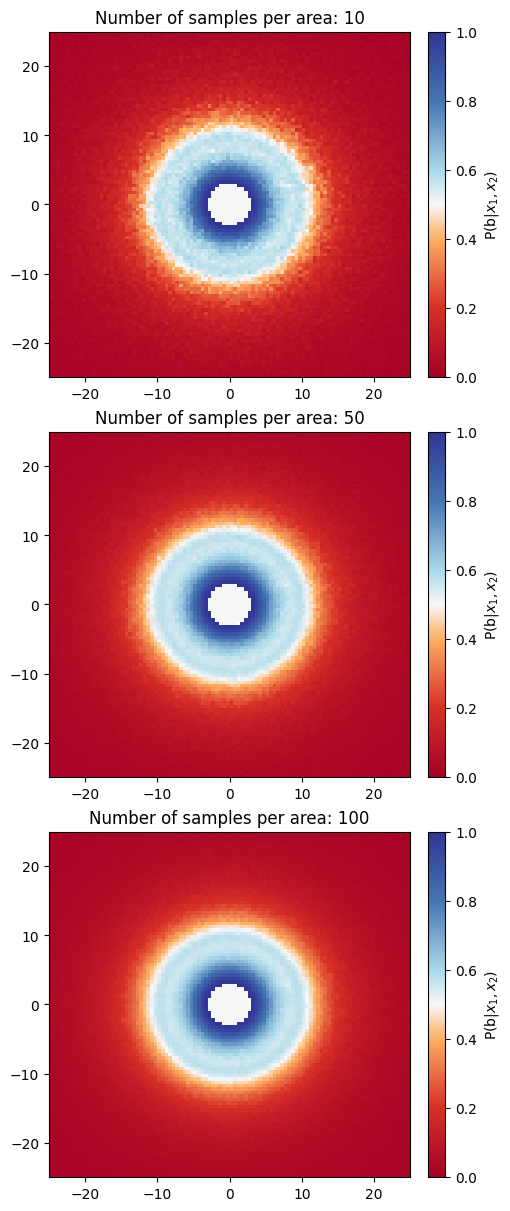

In [24]:
fig, axs = plt.subplots(nrows=(len(nxMC)), ncols=1, figsize= (5, 4*len(nxMC)), layout="constrained")
for i, ax in enumerate(axs):
    data = data_df[i]
    ax = plot_grid(data, "P_blue_given_x", ax, 100)
    cmap = red_blue_cmap()
    hue_norm = mpl.colors.Normalize(vmin=0, vmax=1, clip=False)
    ax.set_title(f"Number of samples per area: {nxMC[i]}")
    fig.colorbar(mpl.cm.ScalarMappable(norm=hue_norm, cmap=cmap), label=r'P(b|$x_1, x_2$)', ax=ax)

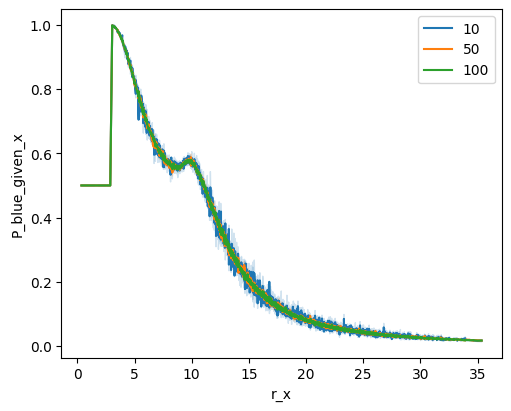

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize= (5, 4), layout="constrained")
for i, file in enumerate(datafiles):
    sn.lineplot(data_df[i], x="r_x", y="P_blue_given_x", label=nxMC[i], ax = ax)
ax.legend()

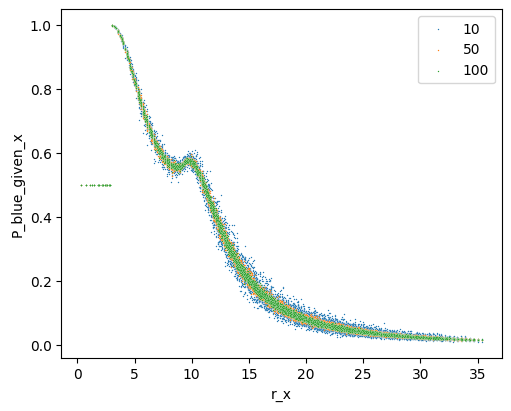

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize= (5,4), layout="constrained")
for i, file in enumerate(datafiles):
    sn.scatterplot(data_df[i], x="r_x", y="P_blue_given_x", s=1, label=nxMC[i], ax = ax)
ax.legend()